# AIDI 2004 - 02
## LAB 2
### ROOPESH NAIR PERAYIL
### 100858755


In [42]:
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt

## Import the Data

In [43]:
column_names = ['id','diagnosis','radius_mean','texture_mean','perimeter_mean','area_mean',
                'smoothness_mean','compactness_mean','concavity_mean','concave_points_mean','symmetry_mean',
                'fractal_dimension_mean','radius_se','texture_se','perimeter_se','area_se','smoothness_se',
                'compactness_se','concavity_se','concave_points_se','symmetry_se','fractal_dimension_se',
                'radius_worst','texture_worst','perimeter_worst','area_worst','smoothness_worst','compactness_worst',
                'concavity_worst','concave_points_worst','symmetry_worst','fractal_dimension_worst']

df = pd.read_csv(r'.\breast_cancer_diagnostic\wdbc.data',names=column_names)
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


## Data Pre-processing & EDA

In [44]:
df.shape

(569, 32)

In [45]:
## info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave_points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [46]:
## Removing unwanted columns
df.drop('id',axis=1, inplace=True)
df.shape

(569, 31)

In [47]:
## summary stats
df.describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [48]:
df.diagnosis.value_counts()

diagnosis
B    357
M    212
Name: count, dtype: int64

In [49]:
## mapping Benign=>0, and Malignant=>1
df['diagnosis'] = df['diagnosis'].map({'B':0,'M':1})
df.diagnosis.value_counts()

diagnosis
0    357
1    212
Name: count, dtype: int64

In [50]:
## finding NA values
df.isnull().sum()

diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave_points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave_points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave_points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

<Axes: >

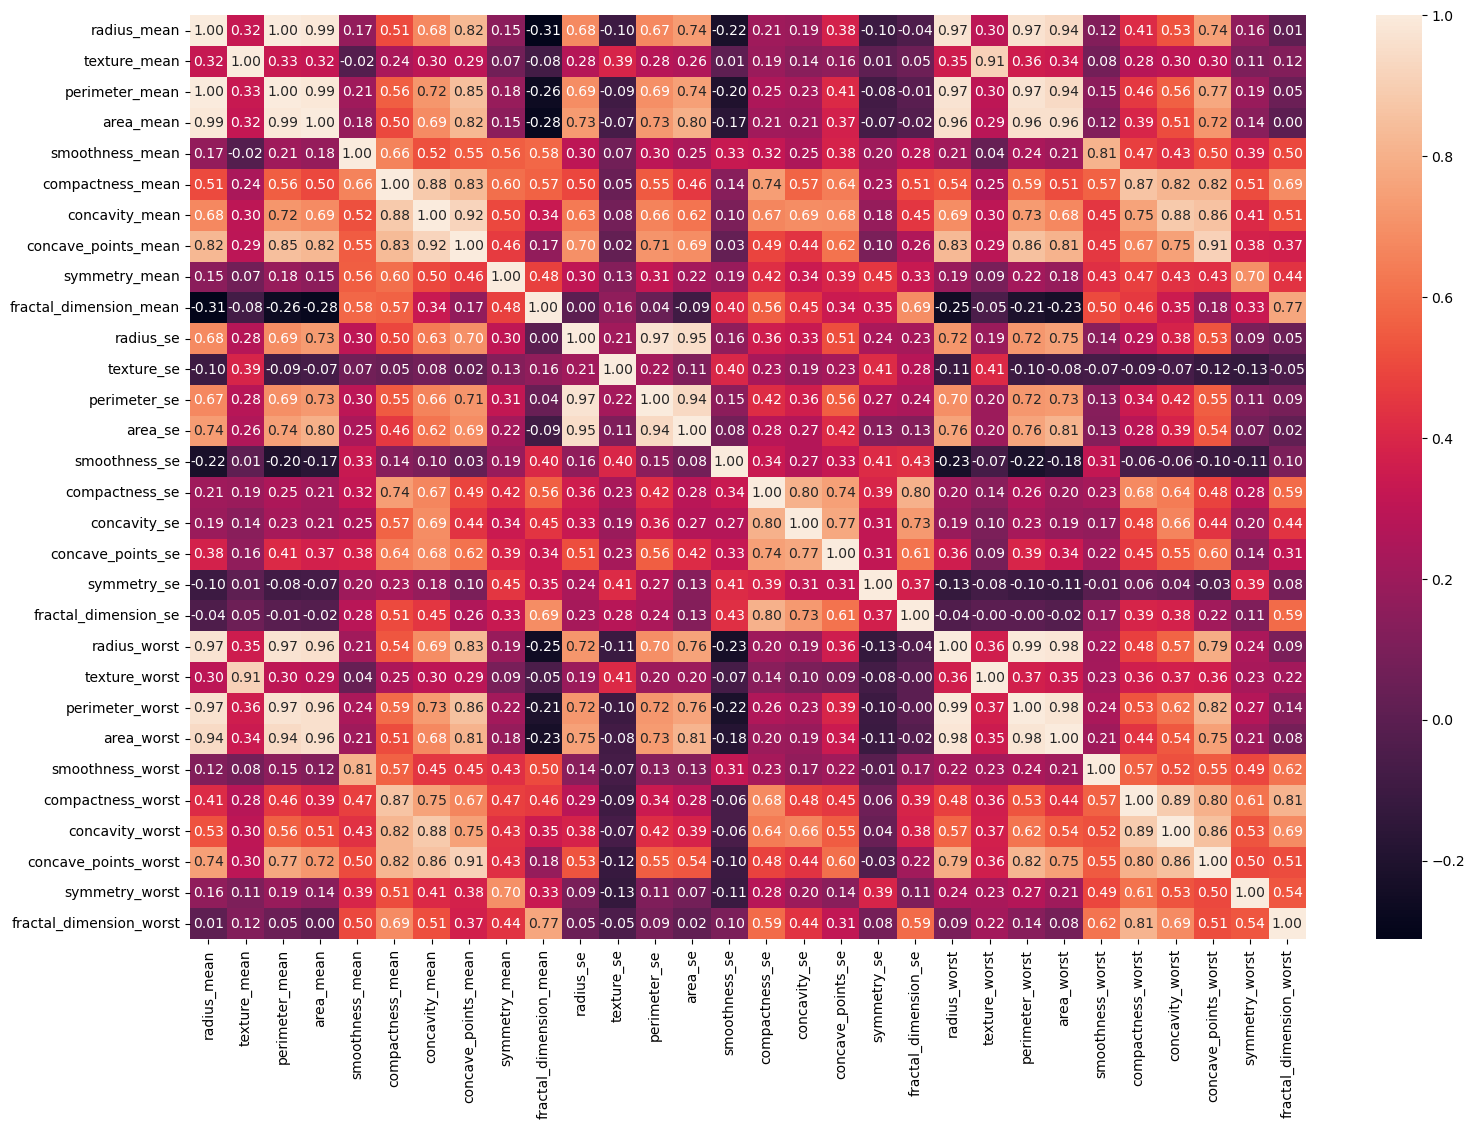

In [53]:
## correlation heatmap
plt.figure(figsize=(18,12))
sns.heatmap(df.drop(['diagnosis'],axis=1).corr(), annot=True,fmt= '.2f')

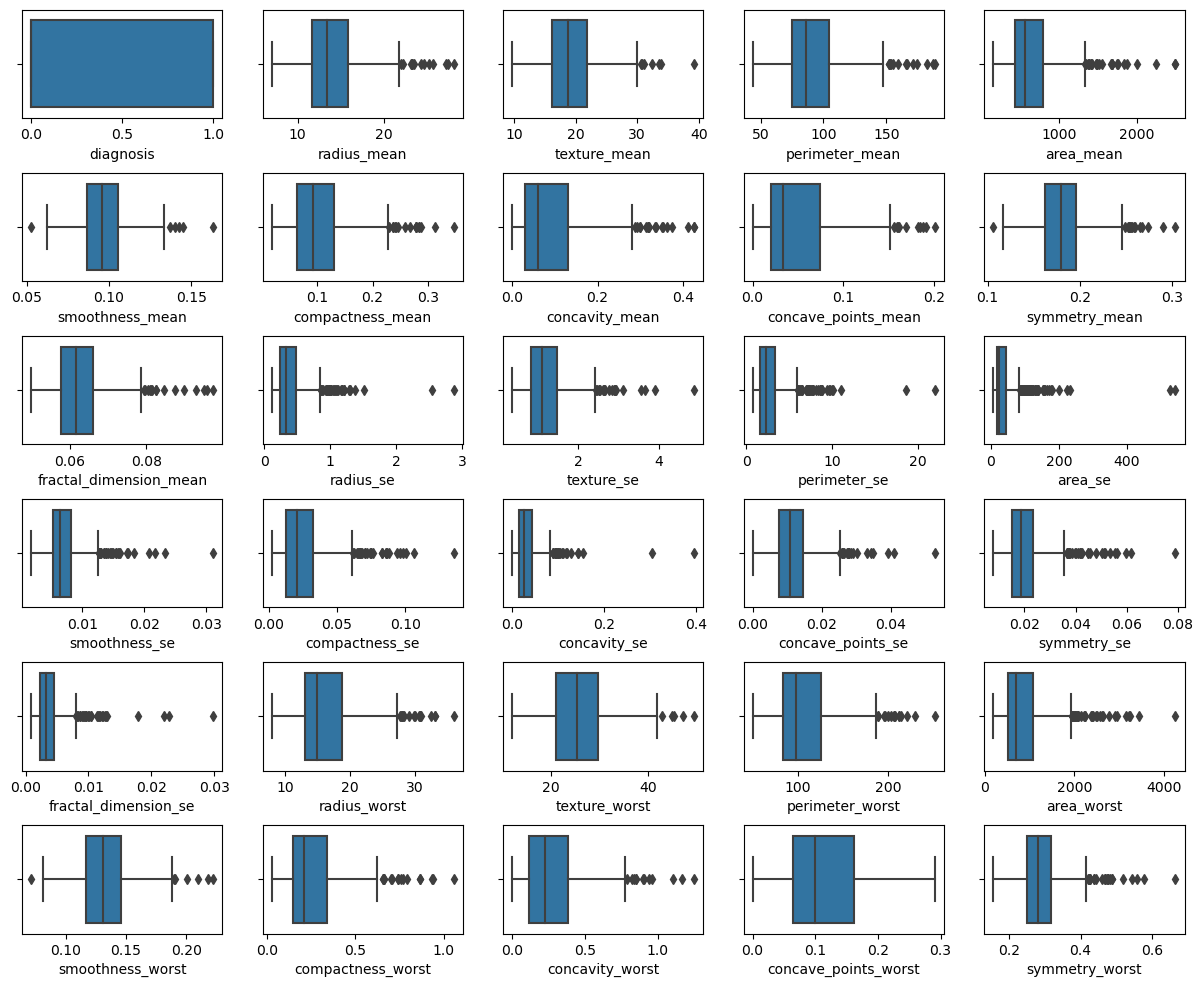

In [84]:
## find the distribution and outliers

# Calculate number of rows and columns needed for subplots
num_rows = 6
num_cols = 5

# Create subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 12))

# Flatten axes for easier iteration
axes = axes.flatten()
plt.subplots_adjust(hspace=0.5)

# Plot boxplots for each column
for i in range(len(df.columns)-1):
    col = df.columns[i]
    sns.boxplot(x=df[col], ax=axes[i])

plt.show()

## Model Training

In [54]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,f1_score,confusion_matrix,classification_report


In [55]:
## separating the dependent and independent features
x = df.drop(columns=['diagnosis'])
y = df['diagnosis']

In [56]:
## normalize the data
scaler = StandardScaler()
x_norm = scaler.fit_transform(x)

In [58]:
## train, test split
x_train,x_test,y_train,y_test = train_test_split(x_norm,y,test_size = 0.2 , stratify=y , random_state=42)

x_train.shape , x_test.shape

((455, 30), (114, 30))

In [86]:
## Random Forest model
rf_model = RandomForestClassifier(n_estimators=100,random_state=42)      
rf_model = rf_model.fit(x_train,y_train)


## Model Evaluation

In [87]:
y_pred = rf_model.predict(x_test)

print(classification_report(y_test,y_pred))


              precision    recall  f1-score   support

           0       0.96      1.00      0.98        72
           1       1.00      0.93      0.96        42

    accuracy                           0.97       114
   macro avg       0.98      0.96      0.97       114
weighted avg       0.97      0.97      0.97       114

